In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from opera_tropo.config import pge_runconfig
from opera_tropo.run import tropo
from opera_tropo.log.loggin_setup import setup_logging
from opera_tropo.utils import get_hres_datetime

In [3]:
cfg = pge_runconfig.RunConfig()
cfg = cfg.from_yaml('../src/opera_tropo/config/default/pge_runconfig.yaml')
cfg.model_dump()

{'input_file': {'input_file_path': 'input_data/D01010000010100001.zz.nc',
  'date_fmt': '%Y%m%d'},
 'output_options': {'date_fmt': '%Y%m%dT%H%M%S',
  'creation_time': datetime.datetime(2025, 6, 26, 23, 33, 37, 259421, tzinfo=datetime.timezone.utc),
  'max_height': 81000,
  'output_heights': [-500,
   -300,
   -200,
   -100,
   -50,
   -20,
   -10,
   0,
   10,
   30.96,
   53.92,
   79.04,
   106.54,
   136.62,
   169.51,
   205.44,
   244.69,
   287.52,
   334.24,
   385.16,
   440.61,
   500.95,
   566.54,
   637.76,
   715.02,
   798.72,
   889.29,
   987.15,
   1092.73,
   1206.44,
   1328.7,
   1459.91,
   1600.44,
   1750.63,
   1910.76,
   2081.09,
   2261.8,
   2452.99,
   2654.69,
   2866.83,
   3089.25,
   3321.67,
   3563.69,
   3814.82,
   4074.41,
   4341.73,
   4615.92,
   4896.02,
   5180.98,
   5469.3,
   5759.3,
   6049.89,
   6340.68,
   6631.66,
   6922.8,
   7214.09,
   7505.51,
   7797.04,
   8088.67,
   8380.36,
   8672.11,
   8963.9,
   9255.7,
   9547.49,
   983

In [4]:
cfg.input_file.input_file_path = 'download_test/ECMWF_TROP_202409100600_202409100600_1.nc'
cfg.log_file = 'download_test/log_sas.log'
cfg.worker_settings.block_shape = (128, 128)

# PGE Scratch directory is runconfig workdirectory
cfg.product_path_group.scratch_path = Path('download_test/data')

In [5]:
cfg.model_dump()

{'input_file': {'input_file_path': 'download_test/ECMWF_TROP_202409100600_202409100600_1.nc',
  'date_fmt': '%Y%m%d'},
 'output_options': {'date_fmt': '%Y%m%dT%H%M%S',
  'creation_time': datetime.datetime(2025, 6, 26, 23, 33, 37, 259421, tzinfo=datetime.timezone.utc),
  'max_height': 81000,
  'output_heights': [-500,
   -300,
   -200,
   -100,
   -50,
   -20,
   -10,
   0,
   10,
   30.96,
   53.92,
   79.04,
   106.54,
   136.62,
   169.51,
   205.44,
   244.69,
   287.52,
   334.24,
   385.16,
   440.61,
   500.95,
   566.54,
   637.76,
   715.02,
   798.72,
   889.29,
   987.15,
   1092.73,
   1206.44,
   1328.7,
   1459.91,
   1600.44,
   1750.63,
   1910.76,
   2081.09,
   2261.8,
   2452.99,
   2654.69,
   2866.83,
   3089.25,
   3321.67,
   3563.69,
   3814.82,
   4074.41,
   4341.73,
   4615.92,
   4896.02,
   5180.98,
   5469.3,
   5759.3,
   6049.89,
   6340.68,
   6631.66,
   6922.8,
   7214.09,
   7505.51,
   7797.04,
   8088.67,
   8380.36,
   8672.11,
   8963.9,
   9255.7

In [6]:
setup_logging(logger_name="opera_tropo", debug=False, filename=cfg.log_file)
setup_logging(logger_name="RAiDER", filename=cfg.log_file)  # not sure if this works, does not pick logging from RAIDER

In [7]:
workflow_cfg = cfg.to_workflow()
print(workflow_cfg.work_directory)

/u/aurora-r0/govorcin/01_OPERA/TROPO/final/tropo/notebooks/download_test/data


In [8]:
hres_date, hres_hour = get_hres_datetime(workflow_cfg.input_options.input_file_path)
output_filename = workflow_cfg.output_options.get_output_filename(hres_date, hres_hour)
output_filename

'OPERA_L4_TROPO-ZENITH_20240910T060000Z_20250626T233337Z_HRES_v0.2.nc'

In [9]:
# Dask worker temp spill directory
workflow_cfg.worker_settings.dask_temp_dir

'download_test/data/tmp'

In [10]:
tropo(file_path = workflow_cfg.input_options.input_file_path, # input settings
      # Output settings
      output_file = Path(workflow_cfg.work_directory) / output_filename,
      out_heights = workflow_cfg.output_options.output_heights,
      max_height=workflow_cfg.output_options.max_height,
      out_chunk_size=workflow_cfg.output_options.chunk_size,
      compression_options = workflow_cfg.output_options.compression_kwargs,
      # Worker settings for parallel processing
      block_size= workflow_cfg.worker_settings.block_shape,
      max_memory=workflow_cfg.worker_settings.max_memory,
      num_workers = workflow_cfg.worker_settings.n_workers,
      num_threads = workflow_cfg.worker_settings.threads_per_worker,
      temp_dir = workflow_cfg.worker_settings.dask_temp_dir,
      )

[INFO|run|L86] 2025-06-26T16:34:42-0700: Calculating TROPO delay


/u/aurora-r0/govorcin/miniconda/miniforge/envs/opera_tropo/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33931 instead
  warnings.warn(
[INFO|checks|L47] 2025-06-26T16:34:43-0700: Performing checkup of input file
[INFO|run|L170] 2025-06-26T16:36:03-0700: Estimating ZTD delay for 20240910T06.


In [11]:
import xarray as xr
from matplotlib import pyplot as plt

In [12]:
# Verify result
ds = xr.open_dataset(workflow_cfg.work_directory / output_filename, chunks={})
ds

<xarray.Dataset> Size: 15GB
Dimensions:            (time: 1, height: 145, latitude: 2560, longitude: 5120)
Coordinates:
  * time               (time) datetime64[ns] 8B 2024-09-10T06:00:00
  * height             (height) float64 1kB -500.0 -300.0 ... 7.458e+04 8.03e+04
  * latitude           (latitude) float64 20kB 89.95 89.88 ... -89.88 -89.95
  * longitude          (longitude) float64 41kB -180.0 -179.9 ... 179.9 179.9
Data variables:
    spatial_ref        int64 8B ...
    hydrostatic_delay  (time, height, latitude, longitude) float32 8GB dask.array<chunksize=(1, 64, 64, 64), meta=np.ndarray>
    wet_delay          (time, height, latitude, longitude) float32 8GB dask.array<chunksize=(1, 64, 64, 64), meta=np.ndarray>
Attributes: (12/18)
    Conventions:          CF-1.8
    title:                OPERA_L4_TROPO-ZENITH
    institution:          NASA Jet Propulsion Laboratory (JPL)
    contact:              opera-sds-ops@jpl.nasa.gov
    source:               ECMWF
    platform:             Model High Resolution 15-day Forecast (HRES)
    ...                   ...
    comment:              Intersect/interpolate with DEM to get SAR correction
    software:             RAiDER
    software_version:     0.5.3
    reference_document:   TBD
    history:              Created on: 2025-06-26 23:33:32.916448+00:00
    reference_time:       2024-09-10 06:00:00

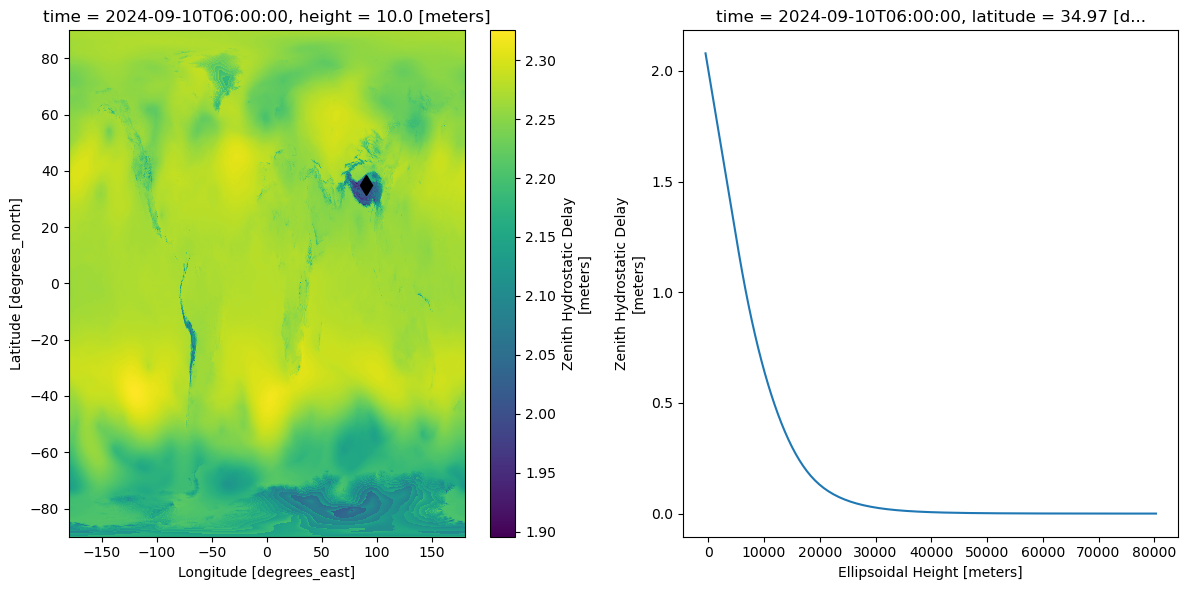

In [13]:
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(12,6))
ds.hydrostatic_delay.isel(time=0, height=8).plot.imshow(ax=ax[0])
ax[0].plot(90, 35, 'kd', ms=10)
ds.hydrostatic_delay.isel(time=0).sel(longitude=90, latitude=35, method='nearest').plot(ax=ax[1])
plt.tight_layout()

In [14]:
mask = (ds.height > 20e3).data
point = ds.hydrostatic_delay.isel(time=0).sel(longitude=90, latitude=35, method='nearest')
point[~mask].sum().values, point[mask].sum().values

(array(113.21237, dtype=float32), array(1.4822023, dtype=float32))

In [15]:
mask = (ds.height > 30e3).data
point = ds.hydrostatic_delay.isel(time=0).sel(longitude=90, latitude=35, method='nearest')
point[~mask].sum().values, point[mask].sum().values

(array(114.50927, dtype=float32), array(0.1853044, dtype=float32))

In [16]:
mask = (ds.height > 35e3).data
point = ds.hydrostatic_delay.isel(time=0).sel(longitude=90, latitude=35, method='nearest')
point[~mask].sum().values, point[mask].sum().values

(array(114.622314, dtype=float32), array(0.07226156, dtype=float32))